<a href="https://colab.research.google.com/github/Tejaswini-Gsl/neural-networks/blob/main/quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
classes = ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

In [12]:
from tensorflow.keras.utils import to_categorical
num_classes = 10
# Preprocess the images
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

In [13]:
x_test.shape,y_test_one_hot.shape

((10000, 28, 28, 1), (10000, 10))

In [14]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [33]:
x_train_1 = x_train_noisy.reshape((len(x_train_noisy), np.prod(x_train_noisy.shape[1:])))
x_test_1 = x_test_noisy.reshape((len(x_test_noisy), np.prod(x_test_noisy.shape[1:])))


In [39]:
x_train_no_noise = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_no_noise = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [34]:
x_test_1.shape

(10000, 784)

In [35]:


from keras.layers import Input, Dense
from keras.models import Model

In [41]:
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
hidden_Layer = Dense(128, activation='relu')(input_img)

encoded = Dense(encoding_dim, activation='relu')(input_img)
# hidden_Layer = Dense(128, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
autoencoder.summary()


Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_13 (Dense)            (None, 32)                25120     
                                                                 
 dense_14 (Dense)            (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
encoder = Model(input_img, encoded)
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [43]:
history= autoencoder.fit(x_train_1, x_train_no_noise,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_1,x_test_no_noise))

Epoch 1/5
235/235 [==============================] - 2s 6ms/step - loss: 0.6939 - accuracy: 0.0017 - val_loss: 0.6937 - val_accuracy: 9.0000e-04
Epoch 2/5
235/235 [==============================] - 1s 6ms/step - loss: 0.6936 - accuracy: 0.0016 - val_loss: 0.6934 - val_accuracy: 9.0000e-04
Epoch 3/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6932 - accuracy: 0.0016 - val_loss: 0.6930 - val_accuracy: 9.0000e-04
Epoch 4/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6929 - accuracy: 0.0016 - val_loss: 0.6927 - val_accuracy: 0.0010
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6925 - accuracy: 0.0016 - val_loss: 0.6924 - val_accuracy: 0.0010


In [44]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
encoder = Model(input_img, encoded)
decoder = Model(encoded_input, decoder_layer(encoded_input))

313/313 [==============================] - 0s 1ms/step


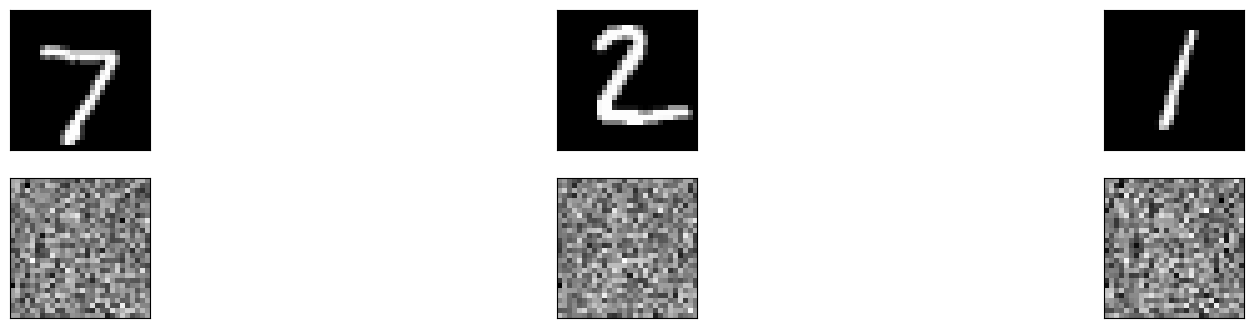

In [46]:
encoded_imgs = encoder.predict(x_test_1)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 3
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# history= autoencoder.fit(x_train_1, x_train_no_noise,
#                 epochs=10,
#                 batch_size=256,
#                 shuffle=True,
#                 validation_data=(x_test_1,x_test_no_noise))

In [ ]:
# autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.8 MB/s eta 0:00:00


In [ ]:
import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adadelta
from kerastuner import HyperModel, RandomSearch

# Define a hypermodel class
class AutoencoderHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        input_img = Input(shape=(self.input_shape,))
        encoding_dim = hp.Int('encoding_dim', min_value=16, max_value=128, step=16)

        # Encoder
        encoded = Dense(encoding_dim, activation='relu')(input_img)

        # Decoder
        decoded = Dense(784, activation='sigmoid')(encoded)

        # Autoencoder model
        autoencoder = Model(input_img, decoded)

        # Compile the model
        lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
        optimizer = Adadelta(learning_rate=lr)
        autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

        return autoencoder

# Instantiate the hypermodel
input_shape = 784
hypermodel = AutoencoderHyperModel(input_shape=input_shape)

# Tuner configuration
tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='autoencoder_tuning',
    project_name='autoencoder_optimization'
)

# Data needs to be provided by the user
# For example:
# (x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Start the search for the best hyperparameters
tuner.search(x_test_1,x_test_no_noise,
             epochs=10,
             validation_data=(x_test_1,x_test_no_noise))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()


Trial 3 Complete [00h 01m 24s]
val_loss: 0.695538341999054

Best val_loss So Far: 0.695538341999054
Total elapsed time: 00h 06m 48s

Search: Running Trial #4

Value             |Best Value So Far |Hyperparameter
16                |128               |encoding_dim
0.00053726        |0.00031605        |learning_rate

Epoch 1/10
313/313 [==============================] - 3s 6ms/step - loss: 0.6938 - accuracy: 0.0023 - val_loss: 0.6937 - val_accuracy: 0.0023
Epoch 2/10
313/313 [==============================] - 2s 5ms/step - loss: 0.6937 - accuracy: 0.0023 - val_loss: 0.6936 - val_accuracy: 0.0022
Epoch 3/10
313/313 [==============================] - 2s 7ms/step - loss: 0.6936 - accuracy: 0.0022 - val_loss: 0.6935 - val_accuracy: 0.0022
Epoch 4/10
313/313 [==============================] - 3s 8ms/step - loss: 0.6935 - accuracy: 0.0022 - val_loss: 0.6934 - val_accuracy: 0.0022
Epoch 5/10
313/313 [==============================] - 2s 7ms/step - loss: 0.6934 - accuracy: 0.0022 - val_loss: 0.69